## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('co2 regression.csv')

### Data Overview

In [3]:
df.head()

,Atmospheric Pressure,indoor_relative_humidity [%],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],occupant_count [number],voc [ppb]
0,57.07,52.02,23.56,2.07,453.50,24,20.0
1,57.02,51.08,23.49,1.97,448.87,21,20.0
2,57.08,50.41,23.42,1.83,447.33,15,20.0
3,57.09,50.50,23.25,1.70,446.07,24,20.0
4,57.02,50.31,23.31,1.67,444.37,22,20.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Atmospheric Pressure          8352 non-null   float64
 1   indoor_relative_humidity [%]  8352 non-null   float64
 2   air_temperature [Celsius]     8352 non-null   float64
 3   pm2.5 [mu_g/m3]               8352 non-null   float64
 4   indoor_co2 [ppm]              8352 non-null   float64
 5   occupant_count [number]       8352 non-null   int64  
 6   voc [ppb]                     8322 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 456.9 KB


In [5]:
df.isnull().value_counts()

Atmospheric Pressure  indoor_relative_humidity [%]  air_temperature [Celsius]  pm2.5 [mu_g/m3]  indoor_co2 [ppm]  occupant_count [number]  voc [ppb]
False                 False                         False                      False            False             False                    False        8322
                                                                                                                                           True           30
Name: count, dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,Atmospheric Pressure,indoor_relative_humidity [%],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],occupant_count [number],voc [ppb]
5301,55.04,71.22,26.63,5.73,467.2,19,NaN
5302,55.04,71.22,26.63,5.73,467.2,21,NaN
5332,55.04,71.22,26.36,5.73,467.2,30,NaN
5333,55.04,71.22,26.36,5.73,467.2,29,NaN
5351,55.04,71.22,26.46,5.73,467.2,21,NaN
5352,55.04,71.22,26.46,5.73,467.2,31,NaN
5353,55.04,71.22,26.46,5.73,467.2,23,NaN
5361,55.04,71.22,26.40,5.73,467.2,23,NaN
5362,55.04,71.22,26.40,5.73,467.2,19,NaN
5363,55.04,71.22,26.40,5.73,467.2,16,NaN


In [7]:
null_val_col = df.columns[df.isnull().any()]

In [8]:
null_val_col

Index(['voc [ppb]'], dtype='object')

In [9]:
df['voc [ppb]'] = df['voc [ppb]'].fillna(df['voc [ppb]'].mean())

In [23]:
df[df.isnull().any(axis=1)]

,Atmospheric Pressure,indoor_relative_humidity [%],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],occupant_count [number],voc [ppb]


In [11]:
df.describe()

,Atmospheric Pressure,indoor_relative_humidity [%],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],occupant_count [number],voc [ppb]
count,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000
mean,55.037877,71.216615,25.572296,5.729484,467.198743,24.156370,24.466612
std,3.012166,11.441777,1.831055,11.261626,80.700283,6.083243,56.618825
min,48.450000,45.390000,20.440000,0.130000,400.000000,15.000000,20.000000
25%,52.450000,63.780000,24.590000,2.070000,426.627500,20.000000,20.000000
50%,54.620000,74.350000,25.510000,3.470000,440.320000,24.000000,20.000000
75%,56.400000,80.220000,26.820000,5.070000,469.210000,28.000000,20.900000
max,78.600000,93.000000,34.000000,186.100000,1489.360000,79.000000,2270.366699


In [12]:
df.corr()

,Atmospheric Pressure,indoor_relative_humidity [%],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],occupant_count [number],voc [ppb]
Atmospheric Pressure,1.000000,-0.421608,-0.381515,0.028969,0.236371,0.006645,0.064483
indoor_relative_humidity [%],-0.421608,1.000000,0.499461,0.018717,-0.148560,0.004680,-0.033728
air_temperature [Celsius],-0.381515,0.499461,1.000000,0.242075,0.212623,0.160120,0.013563
pm2.5 [mu_g/m3],0.028969,0.018717,0.242075,1.000000,0.298075,0.088339,0.051504
indoor_co2 [ppm],0.236371,-0.148560,0.212623,0.298075,1.000000,0.367235,0.060402
occupant_count [number],0.006645,0.004680,0.160120,0.088339,0.367235,1.000000,0.005906
voc [ppb],0.064483,-0.033728,0.013563,0.051504,0.060402,0.005906,1.000000


<Axes: >

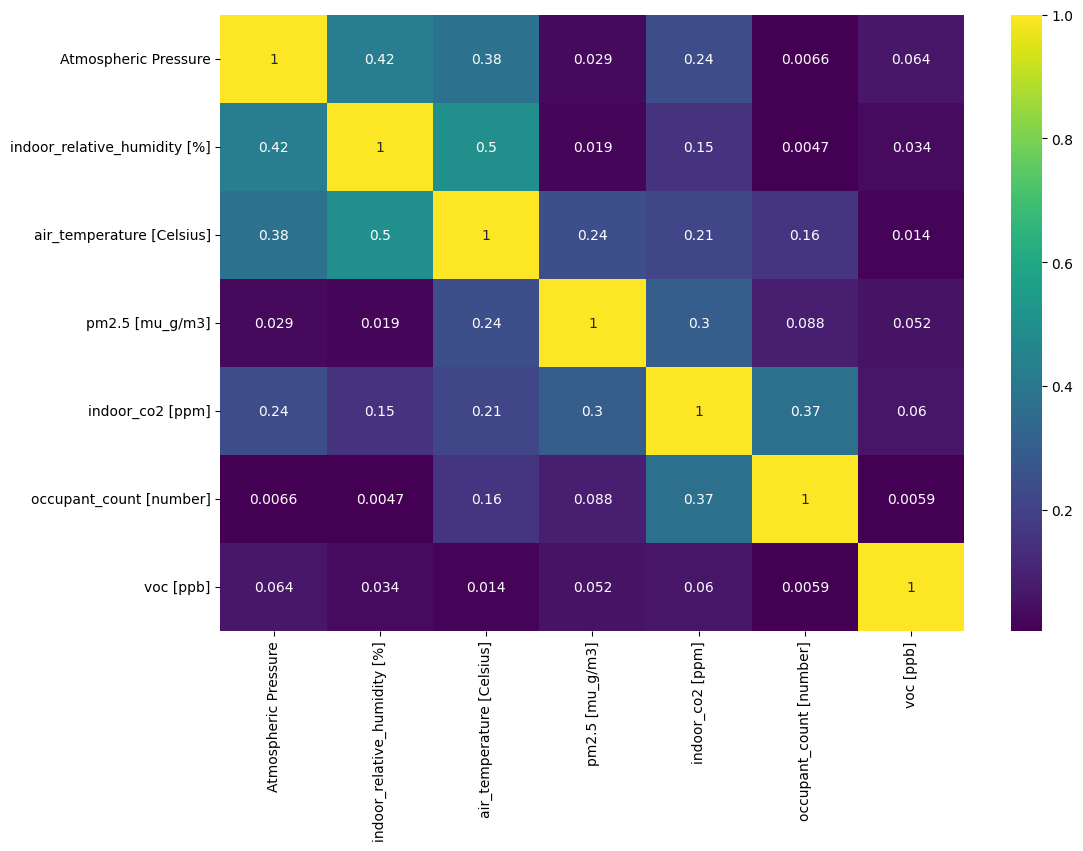

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(),annot=True,cmap='viridis')

Text(0.5, 0, 'indoor_co2 [ppm]')

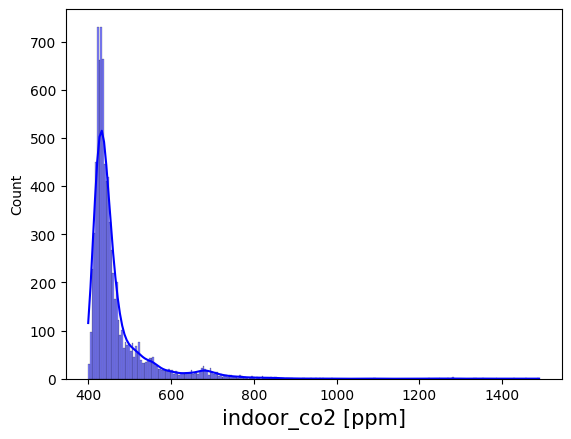

In [14]:

sns.histplot(df['indoor_co2 [ppm]'], color='b', kde=True)
plt.xlabel('indoor_co2 [ppm]',fontsize=15)


<Axes: ylabel='indoor_co2 [ppm]'>

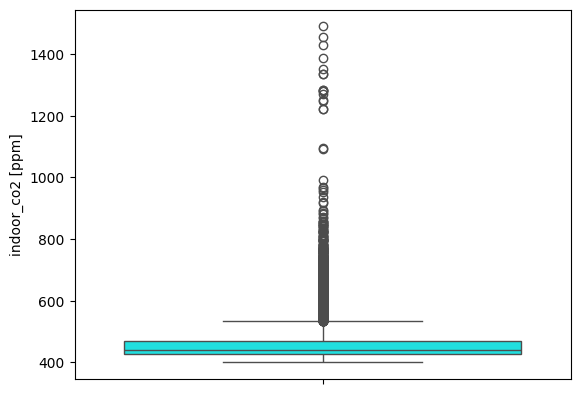

In [15]:
sns.boxplot( y='indoor_co2 [ppm]', data=df,color='cyan')

In [20]:
z_scores = (df['indoor_co2 [ppm]'] - df['indoor_co2 [ppm]'].mean()) / df['indoor_co2 [ppm]'].std()
threshold = 1.2
outliers = df[abs(z_scores) > threshold]
# outliers["indoor_co2 [ppm]"]

46      574.36
47      599.63
48      626.13
49      636.13
50      638.17
         ...  
7872    721.20
7873    652.30
7874    611.04
7875    580.52
7881    580.43
Name: indoor_co2 [ppm], Length: 688, dtype: float64

In [21]:
mean_co2 = df['indoor_co2 [ppm]'].mean()
df.loc[abs(z_scores) > threshold, 'indoor_co2 [ppm]'] = mean_co2

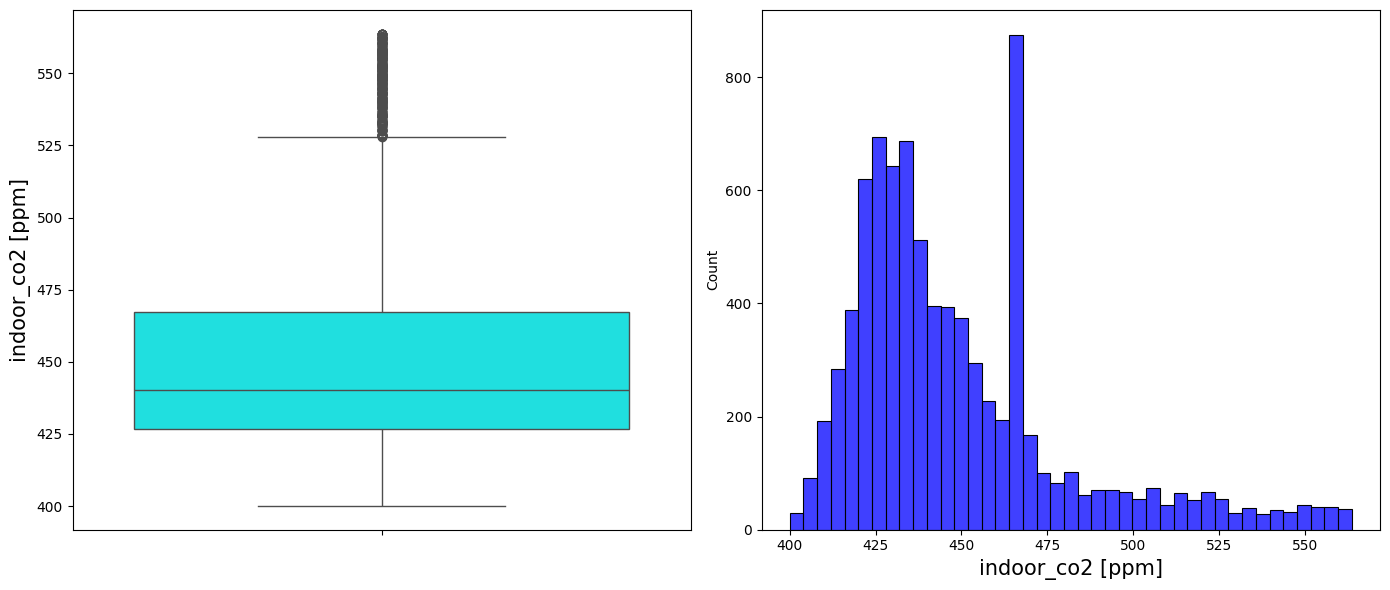

In [22]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='indoor_co2 [ppm]', data=df,color='cyan')
plt.ylabel('indoor_co2 [ppm]',fontsize=15)
plt.subplot(1,2,2)
sns.histplot(df['indoor_co2 [ppm]'], color='b')
plt.xlabel('indoor_co2 [ppm]',fontsize=15)
plt.tight_layout()
plt.show()

In [24]:
Numerical = df.columns

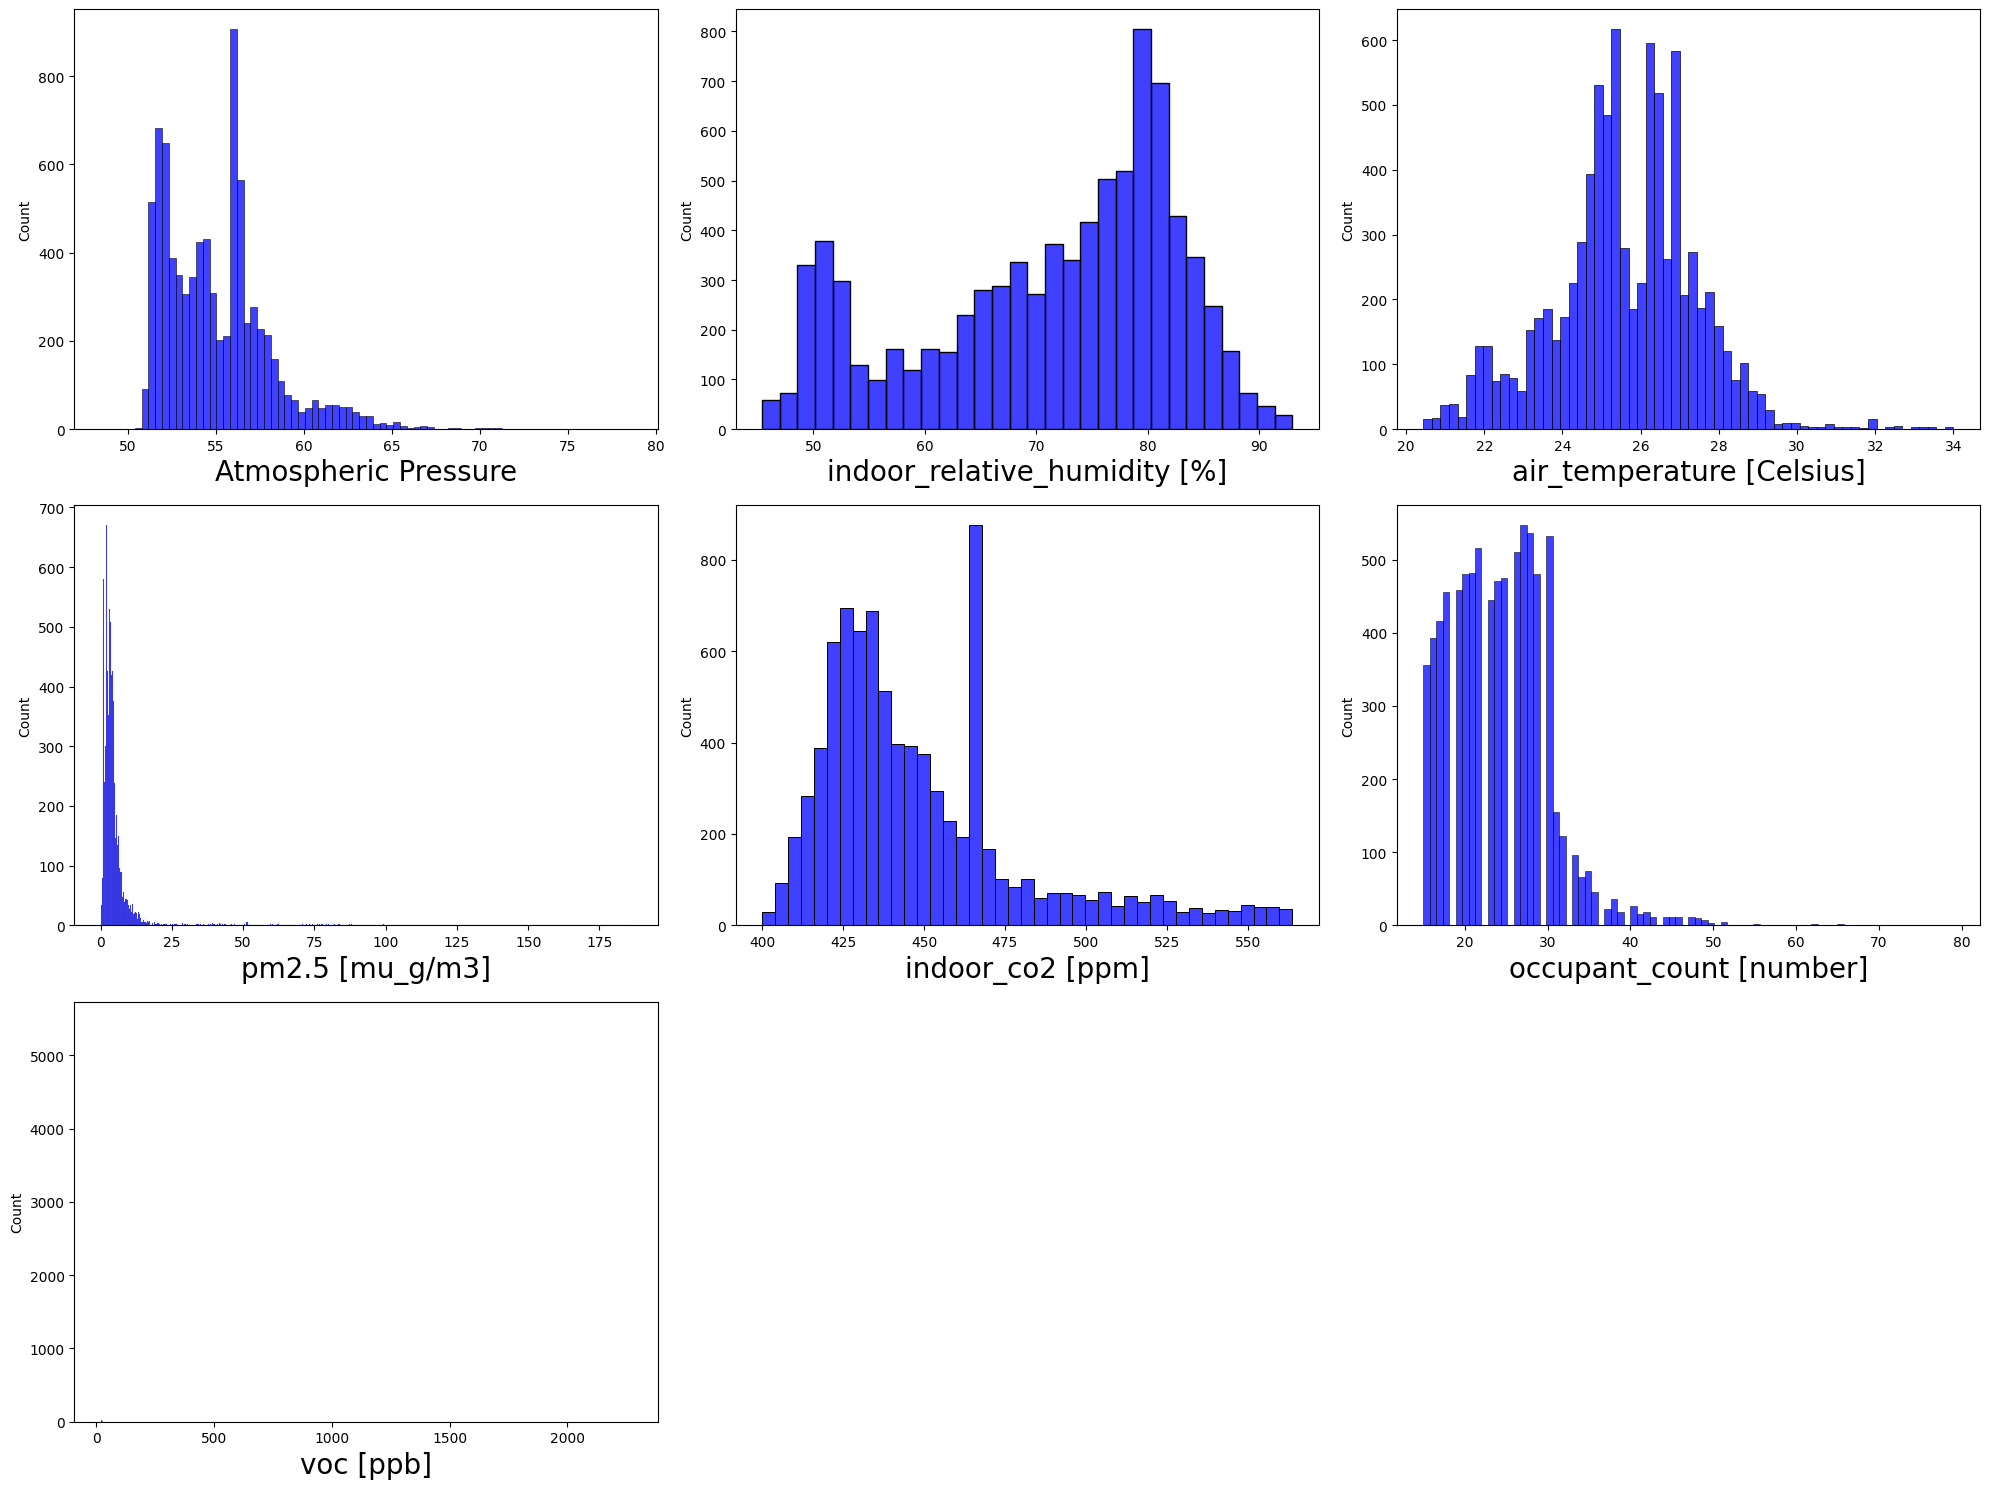

In [25]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [26]:
df.columns

Index(['Atmospheric Pressure', 'indoor_relative_humidity [%]',
       'air_temperature [Celsius]', 'pm2.5 [mu_g/m3]', 'indoor_co2 [ppm]',
       'occupant_count [number]', 'voc [ppb]'],
      dtype='object')

In [27]:
columns_to_plot =['Atmospheric Pressure', 'indoor_relative_humidity [%]',
       'air_temperature [Celsius]', 'pm2.5 [mu_g/m3]',
       'occupant_count [number]', 'voc [ppb]']

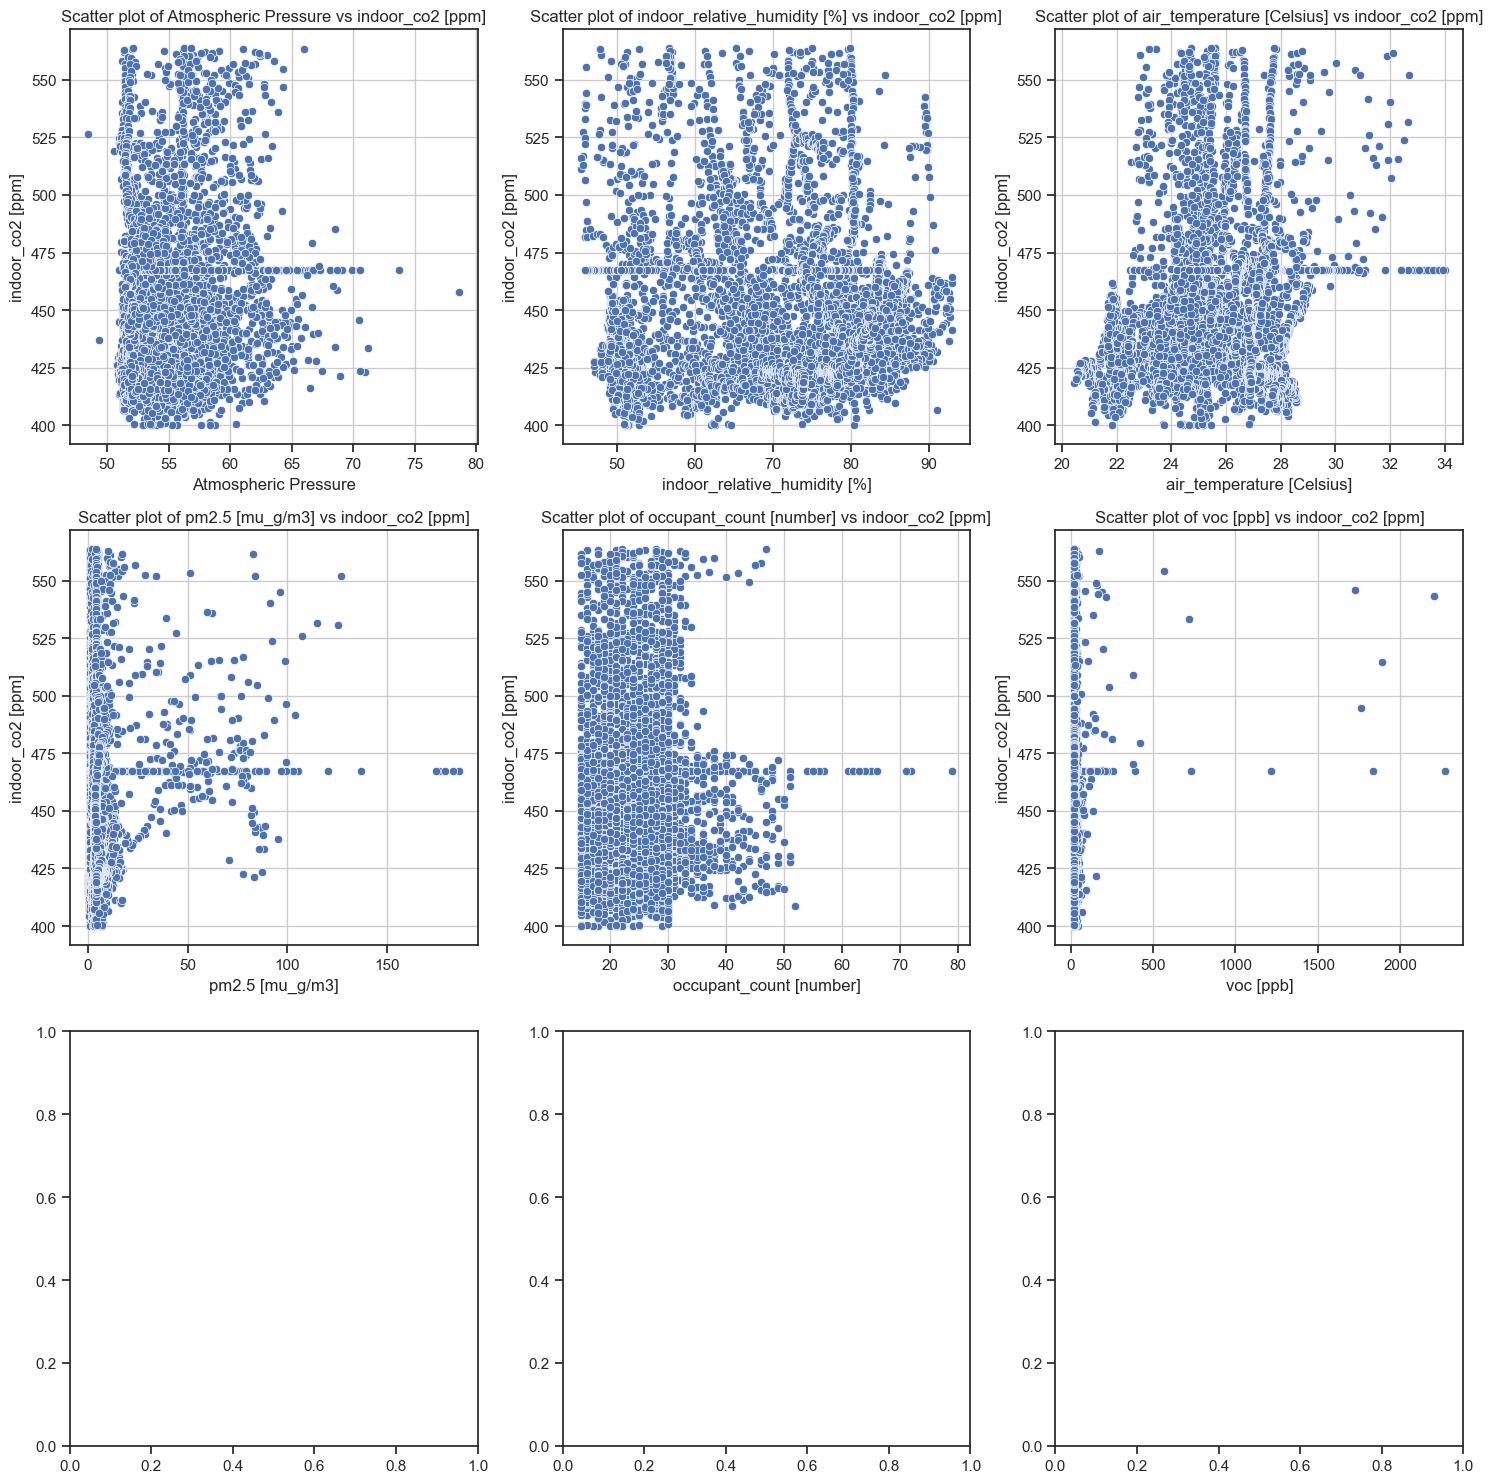

In [28]:
sns.set(style="ticks")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x=column, y='indoor_co2 [ppm]', data=df, ax=axes[i], color='b')
    axes[i].set_title(f'Scatter plot of {column} vs indoor_co2 [ppm]')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('indoor_co2 [ppm]')
    axes[i].grid(True)


plt.tight_layout()

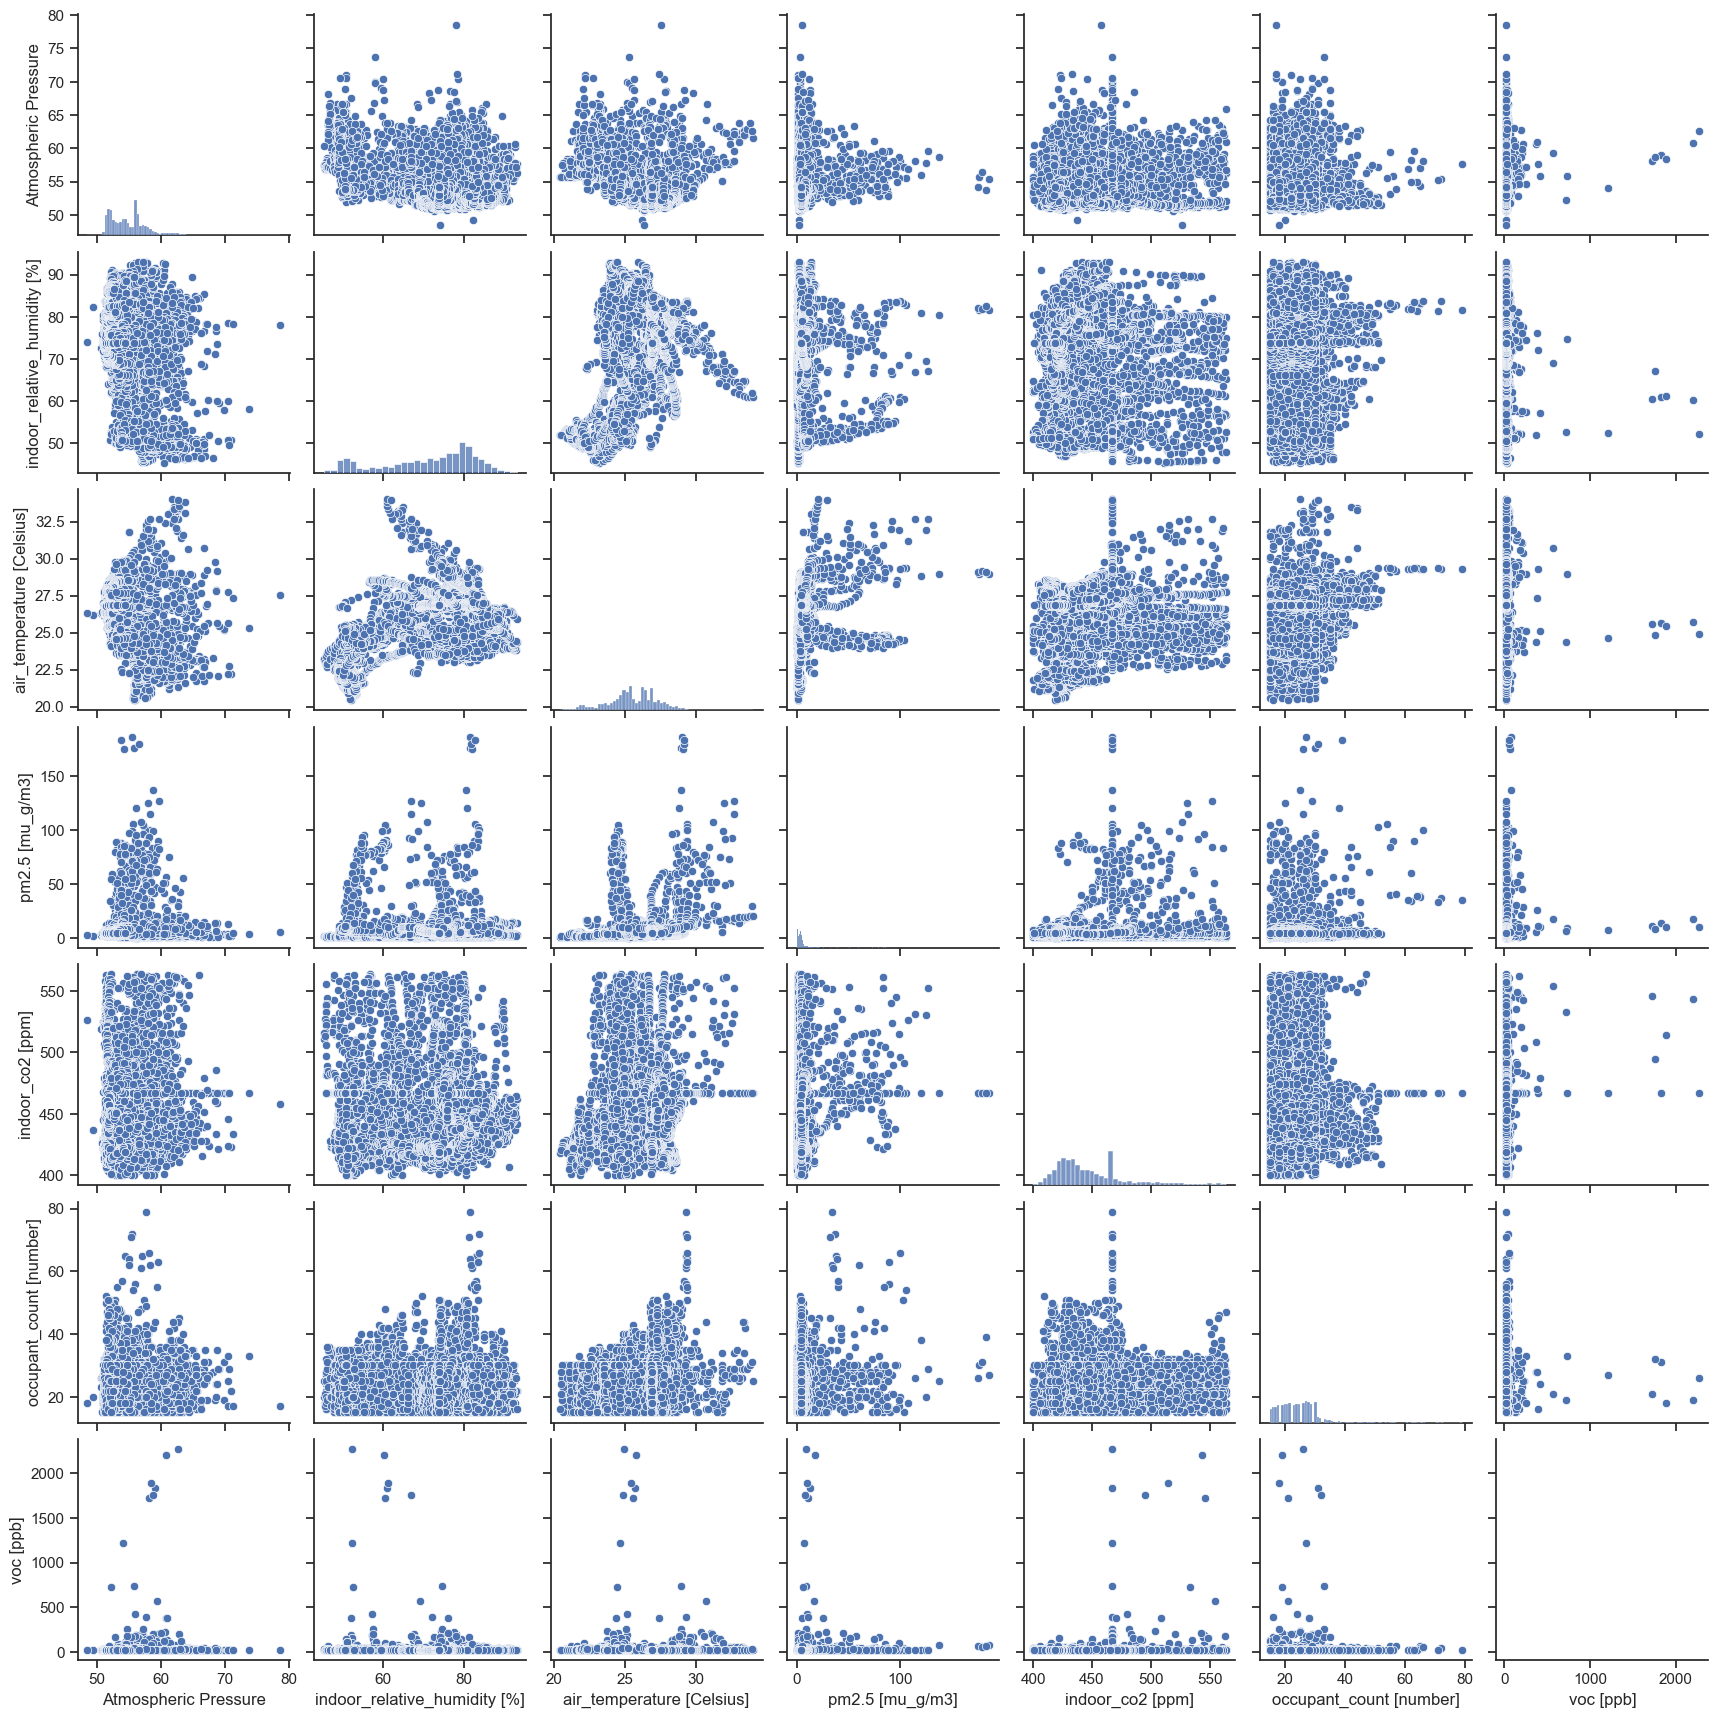

In [29]:
sns.pairplot(df)

## Training and Testing Data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y= df["indoor_co2 [ppm]"]
X= df.drop("indoor_co2 [ppm]", axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5846, 6), (2506, 6), (5846,), (2506,))

#### scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Model


In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Random Forest model


In [45]:
rf = RandomForestRegressor()

In [84]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [85]:
predictions_rf = rf.predict( X_test_scaled)

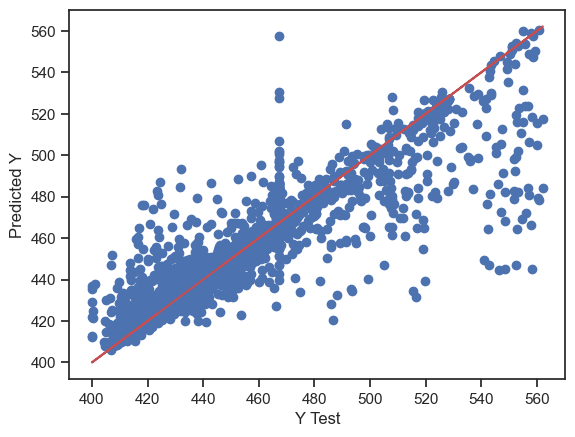

In [116]:
plt.scatter(y_test,predictions_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [87]:
r2 = r2_score(y_test, predictions_rf)

print("R^2 score:", r2)

R^2 score: 0.7783488433857824


In [88]:
print('MAE:', mean_absolute_error(y_test, predictions_rf))
print('MSE:', mean_squared_error(y_test, predictions_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_rf)))

MAE: 8.115246569268278
MSE: 234.4676113700003
RMSE: 15.312335268338408


<Axes: xlabel='indoor_co2 [ppm]', ylabel='Count'>

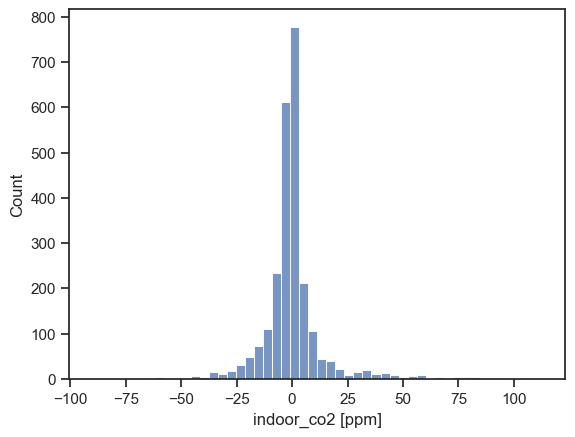

In [89]:
sns.histplot((y_test-predictions_rf),bins=50)

### Gradient Boosting Regressor

In [77]:
gb_regressor = GradientBoostingRegressor()

In [78]:
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [79]:
predictions_gb_regressor = gb_regressor.predict( X_test)

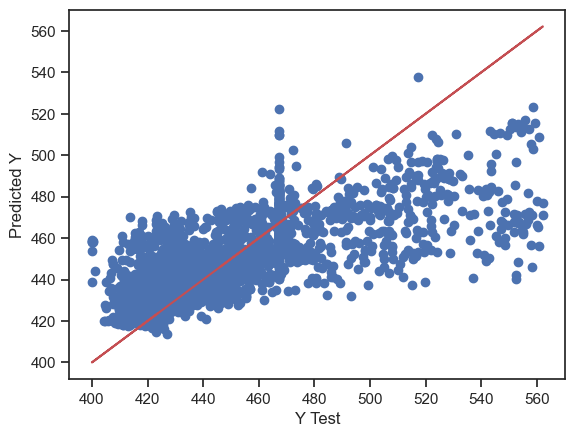

In [115]:
plt.scatter(y_test,predictions_gb_regressor)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [81]:
r2 = r2_score(y_test, predictions_gb_regressor)

print("R^2 score:", r2)

R^2 score: 0.4864915904800651


In [82]:
print('MAE:', mean_absolute_error(y_test, predictions_gb_regressor))
print('MSE:', mean_squared_error(y_test, predictions_gb_regressor))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_gb_regressor)))

MAE: 16.371034662336356
MSE: 543.2008207748916
RMSE: 23.306669019293416


<Axes: xlabel='indoor_co2 [ppm]', ylabel='Count'>

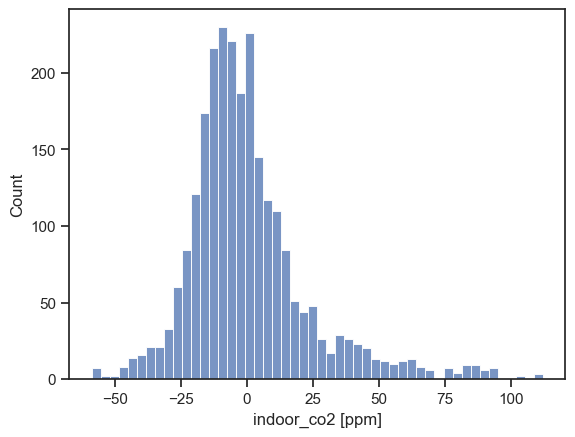

In [83]:
sns.histplot((y_test-predictions_gb_regressor),bins=50)

### Decision Tree

In [68]:
dt = DecisionTreeRegressor()

In [90]:
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [92]:
predictions_dt = dt.predict(X_test_scaled)

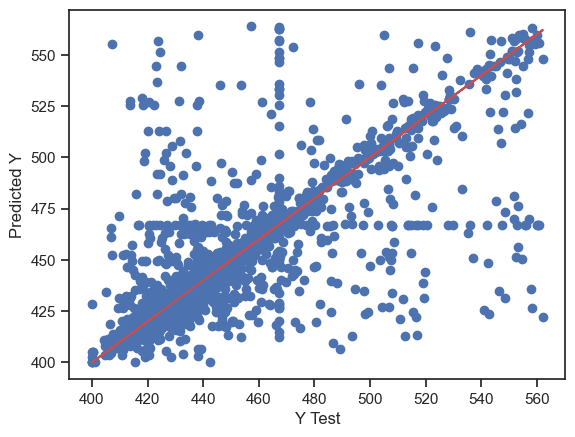

In [114]:
plt.scatter(y_test,predictions_dt)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [94]:
r2 = r2_score(y_test, predictions_dt)

print("R^2 score:", r2)


R^2 score: 0.5410384024223269


In [95]:
print('MAE:', mean_absolute_error(y_test, predictions_dt))
print('MSE:', mean_squared_error(y_test, predictions_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_dt)))

MAE: 10.073484186802267
MSE: 485.4999682311319
RMSE: 22.0340638156272


<Axes: xlabel='indoor_co2 [ppm]', ylabel='Count'>

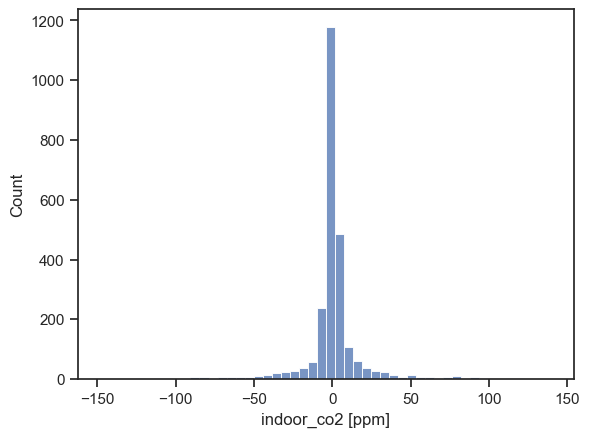

In [96]:
sns.histplot((y_test-predictions_dt),bins=50)

## tensorflow Sequential

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
X_train_minmax= scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [100]:
X_train_minmax.shape

(5846, 6)

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='linear'))


In [103]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [105]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15)

In [106]:
model.fit(X_train_minmax, y_train, validation_data=(X_test_minmax, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[ early_stop])

Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 187832.6562 - val_loss: 2535.8933
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2512.7852 - val_loss: 2222.0376
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2257.0735 - val_loss: 1963.0106
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1840.0033 - val_loss: 1732.2610
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1683.4727 - val_loss: 1504.6283
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1401.3083 - val_loss: 1229.4282
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1163.1241 - val_loss: 1078.5574
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1003.5304 - val_loss: 1011.1281
Epoch 9/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 940.2399 - val_loss: 979.2943
Epoch 10/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 928.5623 - val_loss: 987.1060
Epoch 11/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 920.8853

In [107]:
losses = pd.DataFrame(model.history.history)

<Axes: >

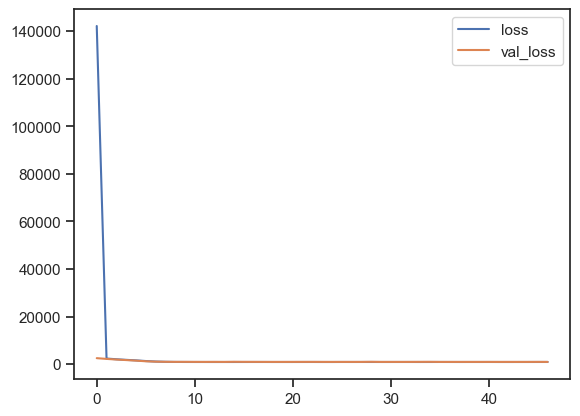

In [108]:
losses.plot()

In [109]:
predictions = model.predict(X_test_minmax)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [113]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 956.3088052960942
Mean Absolute Error: 22.4017370326863
R-squared Score: 0.09596489026475086


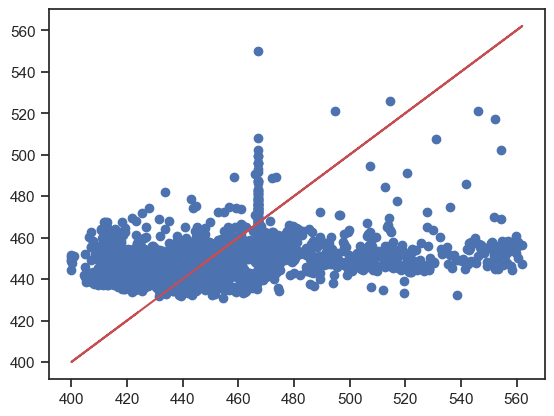

In [110]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

## Personal Customization Hypertune Parameters

### Hypertune Parameters tuning for Random Forest

In [102]:
model = RandomForestRegressor()

In [103]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


In [104]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

In [105]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [106]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [107]:
best_model = grid_search.best_estimator_

In [115]:
predictions_best_model = best_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

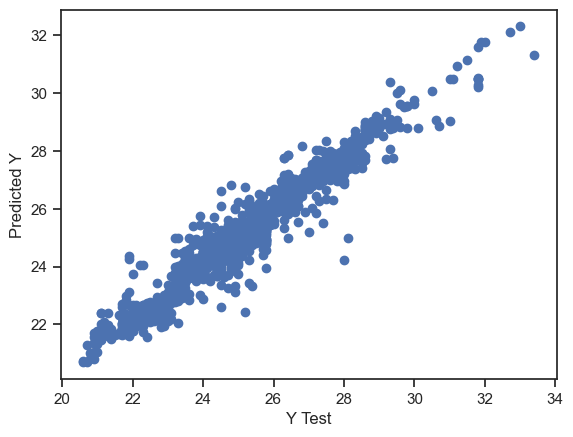

In [116]:
plt.scatter(y_test,predictions_best_model)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Best model evaluation  

In [117]:
r2 = r2_score(y_test, predictions_best_model)

print("R^2 score:", r2)

R^2 score: 0.950534947329079


In [118]:
print('MAE:', mean_absolute_error(y_test, predictions_best_model))
print('MSE:', mean_squared_error(y_test, predictions_best_model))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_best_model)))

MAE: 0.24608179889593795
MSE: 0.16797360703014408
RMSE: 0.4098458332472639


<Axes: xlabel='optimal temperature', ylabel='Count'>

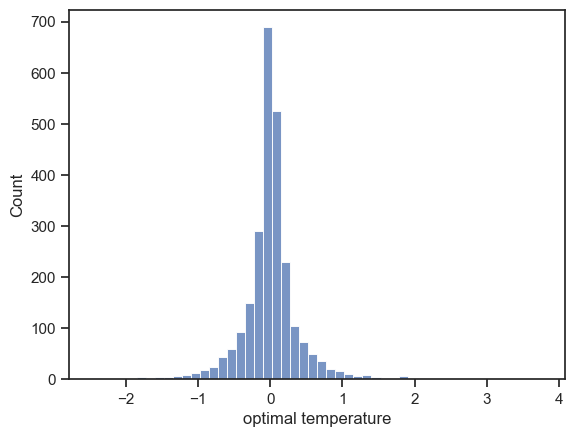

In [119]:
sns.histplot((y_test-predictions_best_model),bins=50)

In [120]:
import pickle

with open('room_co2_prediction.pkl', 'wb') as f:
    pickle.dump(best_model, f)